**WARNING POINT**

- KOSIS 공유서비스를 통한 대용량통계자료 크롤링 과정에서 데이터 내부의 다양한 피쳐 및 기간, 유저아이디 등에 따라 URL이 달라지는 이슈가 있음
- 현재는 개인 아이디를 활용하여 URL 생성 및 데이터 크롤링을 진행하였지만, 만약 원하는 데이터 상태가 변할 경우 URL 삭제 후 재생성을 진행해야하기 때문에 회사 내의 계정이 있으면 좋을 것 같다고 생각함

In [2]:
# import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import requests
import pprint
from tqdm import tqdm
import time

from random import uniform, seed
seed(1)
import re

from bs4 import BeautifulSoup
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
start_date = '201001'
end_date = '202208'
term = 152

In [4]:
#### 데이터 크롤링
def data_crawling(url, col_cnt):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    data = soup.find_all('cell')
    
    col_lst =[]
    for i in range(term+col_cnt):
        col_lst.append(data[i].find('data').get_text())

    row_lst = []
    for i in range(term+col_cnt,len(data),term+col_cnt):
        row_l = []
        for a in range(i,i+term+col_cnt):
            row_l.append(data[a].find('data').get_text())
        row_lst.append(row_l)
        
    data = pd.DataFrame(row_lst, columns= col_lst)
    data.iloc[:,col_cnt:]= data.iloc[:,col_cnt:].astype(float)
    data.iloc[0,col_cnt:] = data.iloc[:,col_cnt:].sum(axis=0)
    return data.iloc[0:1,col_cnt:]

In [5]:
#### 계절성 제거
def seasonal_remove(data):
    data_value = data.T
    data_value = data_value.reset_index()
    data_value['index'] = pd.to_datetime(data_value['index'],format = '%Y%m')

    data_value.columns=['index', 'value']
    data_value.set_index('index',inplace=True)

    result_mul = seasonal_decompose(data_value['value'], model='multiplicative', extrapolate_trend='freq')
    data.iloc[:,:] = data_value['value']/result_mul.seasonal
    return data

#### 광공업생산지수

In [6]:
광공업_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/101/DT_1F01501/3/1/20221025135506&prdSe=M&startPrdDe={start_date}&endPrdDe={end_date}'

광공업생산지수 = data_crawling(광공업_url,6)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


#### 서비스업생산지수

In [7]:
서비스업_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/101/DT_1KS2015/3/1/20221025135852&prdSe=M&startPrdDe={start_date}&endPrdDe={end_date}'

서비스업생산지수=data_crawling(서비스업_url,4)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


#### 판매액지수

In [8]:
판매액_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/101/DT_1K31012/3/1/20221025153504&prdSe=M&startPrdDe={start_date}&endPrdDe={end_date}'

판매액지수=data_crawling(판매액_url,4)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


#### 설비투자지수

In [9]:
설비투자_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/101/DT_1F70011/3/1/20221025154030&prdSe=M&startPrdDe={start_date}&endPrdDe={end_date}'

설비투자지수=data_crawling(설비투자_url, 4)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


#### 건설기성액(계절)

In [10]:
건설기성액_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/101/DT_1G18003/3/1/20221019162725&prdSe=M&startPrdDe={start_date}&endPrdDe={end_date}'

건설기성액_계절 = data_crawling(건설기성액_url,4)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


#### 취업자

In [11]:
취업자_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/101/DT_1DA9001S/3/1/20221021161107&prdSe=M&startPrdDe={start_date}&endPrdDe={end_date}'

취업자 = data_crawling(취업자_url, 4)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


#### 수출_수입 - 계절성 제거 안함

In [12]:
수v1_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/360/DT_1R11001_FRM101_2019/3/1/20221019171428&prdSe=M&startPrdDe={start_date}&endPrdDe=201912'

response = requests.get(수v1_url)
soup = BeautifulSoup(response.content, 'html.parser')
data = soup.find_all('cell')

col_lst =[]
for i in range(124):
    col_lst.append(data[i].find('data').get_text())
row_lst = []
for i in range(124,372,124):
    row_l = []
    for a in range(i,i+124):
        row_l.append(data[a].find('data').get_text())
    row_lst.append(row_l)

수_v1 = pd.DataFrame(row_lst, columns= col_lst)
수_v1.iloc[:,4:] = 수_v1.iloc[:,4:].astype(float)
##################################################################################
수v2_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/360/DT_1R11001_FRM101/3/1/20221019170905&prdSe=M&startPrdDe=202001&endPrdDe={end_date}'

response = requests.get(수v2_url)
soup = BeautifulSoup(response.content, 'html.parser')
data = soup.find_all('cell')

col_lst =[]
for i in range(36):
    col_lst.append(data[i].find('data').get_text())
row_lst = []
for i in range(36,108,36):
    row_l = []
    for a in range(i,i+36):
        row_l.append(data[a].find('data').get_text())
    row_lst.append(row_l)

수_v2 = pd.DataFrame(row_lst, columns= col_lst)
수_v2.iloc[:,4:] = 수_v2.iloc[:,4:].astype(float)
##################################################################################
수출입 = pd.concat([수_v1,수_v2.iloc[:,4:]],axis=1).iloc[:,4:]
수출 = 수출입.iloc[0:1,:]
수입 = 수출입.iloc[1:,:]

# 계절성 제거 
수출=seasonal_remove(수출)
수입=seasonal_remove(수입)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` int

#### 기업경기실사지수

In [13]:
기업경기_url = f'https://kosis.kr/openapi/statisticsBigData.do?method=getList&apiKey=ODY0ZWE0ZGE3NGZkNjNiZGIwMzhiNDRhYTI2ZTE0MzM=&format=xls&userStatsId=jjang2142/301/DT_512Y013/3/1/20221019172905&prdSe=M&startPrdDe={start_date}&endPrdDe={end_date}'

기업경기실사지수 = data_crawling(기업경기_url, 6)
기업경기실사지수=seasonal_remove(기업경기실사지수)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


---

**x축 - 경제지표의 전월대비 증감\
y축 - 지표의 순환변동치(변동 추세의 상하회 정도)**

#### 경기순환시계

그래프 상에서 보여지는 값과 실제 데이터를 불러온 값을 비교해봤을 때 정확한 값이 나오지 않는다.

추출한 값에 문제가 있는 것인지 혹은 지표상에 사용한 값이 다른 것인지 파악을 해야할 것으로 보인다.\
한마디로 경기순환시계에 대한 세부적인 내용을 파악해야할 것으로 보인다.


주식형, 원자재형, 채권형 등 어떤식으로 분류하는지, 어떤 분류에서 어떤 추천을 하면 좋을지

이용시 유의사항

1. 경기순환시계의 구성지표들은 계절(seasonal), 불규칙(irregular) 및 추세(trend) 변동요인이 제거된 순환변동요인(cyclical component, 순환변동치)과 그 전월차 자료를 이용하여 만들었기 때문에, 원계열 또는 계절조정계열과는 증감 방향이 다를 수 있습니다.

- 방법론 요약\
릿지 회귀분석처럼 제약조건이 있는 코스트함수를 사용 (아래 수식참조)

- 파이썬  라이브러리 있음\
     import statsmodels.api as sm\
     df = 시계열 데이터프레임\
     cycle, trend = sm.tsa.filters.hpfilter( df, 14400)\
     - 여기서 파라메터로 월별데이터이면 람다값을 14,400으로 사용,  분기는 1600\
로직은 추세항 g_t를  추정하여   순환항 c_t를 구함

- 14400 논문상 
- 현재는 3000 최적
- 람다값이 무엇인지, 총 기간이 얼마나 되는지 - 번호:042-481-2209
- 람다값은 각각 다르게 지정하였음, 기간은 존재하는 데이터를 모두 사용

In [14]:
def func_diff(data,lamb):
    data_time = data.T
    data_time.columns=['value']

    # 추세 변동요인 추출 - trend
    cycle, trend = sm.tsa.filters.hpfilter(data_time,lamb)

    data_불규칙 = pd.DataFrame(cycle)
    # 불규칙 변동요인 제거한 순환변동요인 추출 - cycle2
    unrule, cycle2 = sm.tsa.filters.hpfilter(data_불규칙,lamb)
    # 표준화
    cycle_std = (cycle2-np.mean(cycle2))/np.std(cycle2)
    return cycle_std, cycle_std.diff()

In [15]:
# lambda 임의 정의

광공업생산지수_y,광공업생산지수_x = func_diff(광공업생산지수,2100)
서비스업생산지수_y,서비스업생산지수_x = func_diff(서비스업생산지수,650)
판매액지수_y,판매액지수_x = func_diff(판매액지수,145)
설비투자지수_y,설비투자지수_x = func_diff(설비투자지수,580)
건설기성액_y,건설기성액_x = func_diff(건설기성액_계절,800)
수출_y,수출_x = func_diff(수출,2450)
수입_y,수입_x = func_diff(수입,6000)
취업자_y,취업자_x = func_diff(취업자,610)
기업경기실사지수_y,기업경기실사지수_x = func_diff(기업경기실사지수,11200)

In [16]:
data_all = pd.DataFrame([광공업생산지수_x,광공업생산지수_y,서비스업생산지수_x,서비스업생산지수_y,판매액지수_x,판매액지수_y,
             설비투자지수_x,설비투자지수_y,건설기성액_x,건설기성액_y,수출_x,수출_y,수입_x,수입_y,
             취업자_x,취업자_y,기업경기실사지수_x,기업경기실사지수_y])

data_all.index = ['광공업생산지수_x','광공업생산지수_y','서비스업생산지수_x','서비스업생산지수_y','판매액지수_x','판매액지수_y',
             '설비투자지수_x','설비투자지수_y','건설기성액_x','건설기성액_y','수출_x','수출_y','수입_x','수입_y',
             '취업자_x','취업자_y','기업경기실사지수_x','기업경기실사지수_y']

data_all=data_all.T
data_lst = ['광공업생산지수','서비스업생산지수','판매액지수','설비투자지수','건설기성액',
            '수출','수입','취업자','기업경기실사지수']
point_lst = ['x', 'v', 's', '<', '>','x', 'v', 's', '<']

---


In [17]:
import seaborn as sns
colors = sns.color_palette('hls',len(data_lst))

def plot_make(date):
    fig = plt.figure(figsize=(12,12))
    plt.rcParams['font.family']='Malgun Gothic'
    plt.rcParams['axes.unicode_minus']=False
    fig.set_facecolor('white')

    plt.axvline(x=0,alpha = 0.3)  # draw x =0 axes
    plt.axhline(y=0,alpha = 0.3)   # draw y =0 axes

    for i,y in enumerate(data_lst):
        plt.scatter(data_all.loc[f'{date}',data_all.columns.str.contains(y)*data_all.columns.str.contains('_x')],
                   data_all.loc[f'{date}',data_all.columns.str.contains(y)*data_all.columns.str.contains('_y')],
                   color=colors[i],label=f'{y}', s=150, marker=point_lst[i])
    plt.legend()
    plt.xlim([-2,2])
    plt.ylim([-7,7])
    plt.show()

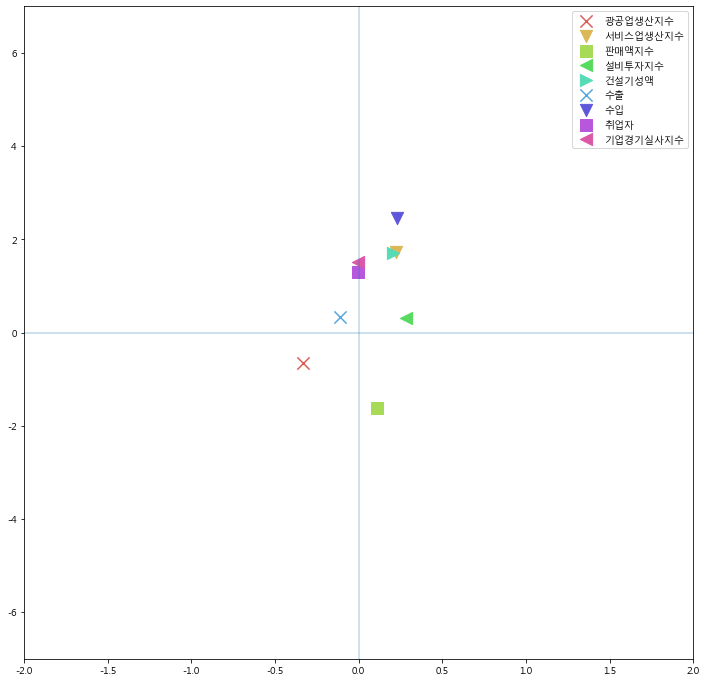

In [20]:
plot_make('202208')

---

#### trend 성 체크 

In [458]:
광공업생산지수_time['trend']=trend

In [460]:
광공업생산지수_불규칙['trend']=cycle2

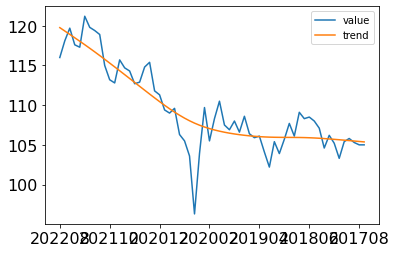

In [459]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
광공업생산지수_불규칙[["value", "trend"]][:].plot(ax=ax,fontsize=16)
plt.show()